In [344]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [345]:
df= pd.read_csv('./agaricus-lepiota.data')
df.columns=['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment', 'gill-spacing', 'gill-size',   'gill-color',   'stalk-shape',   'stalk-root',   'stalk-surface-above-ring',
     'stalk-surface-below-ring',
     'stalk-color-above-ring',
     'stalk-color-below-ring',
     'veil-type',
     'veil-color',
     'ring-number',
     'ring-type',
     'spore-print-color',
     'population',
     'habitat'
]

In [346]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [347]:
y=df['class']
x=df.drop('class', axis=1)
x.describe()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3655,3244,2283,4748,3528,7913,6811,5612,1728,4608,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [348]:
enc_x= LabelEncoder()
for col in x.columns:
    x[col]=enc_x.fit_transform(x[col])
print(x)

      cap-shape  cap-surface  cap-color  bruises?  odor  gill-attachment  \
0             5            2          9         1     0                1   
1             0            2          8         1     3                1   
2             5            3          8         1     6                1   
3             5            2          3         0     5                1   
4             5            3          9         1     0                1   
...         ...          ...        ...       ...   ...              ...   
8118          3            2          4         0     5                0   
8119          5            2          4         0     5                0   
8120          2            2          4         0     5                0   
8121          3            3          4         0     8                1   
8122          5            2          4         0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0      

In [349]:
enc_y= LabelEncoder()
y= enc_y.fit_transform(y)
print(y)

[0 0 1 ... 0 1 0]


In [350]:
X_train, X_test, Y_train, Y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [351]:
scaler= MaxAbsScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [352]:
svd = TruncatedSVD(n_components=4,n_iter=10, random_state=40)
X_train=svd.fit_transform(X_train)
X_test= svd.transform(X_test)

In [353]:
classifier= Perceptron()
classifier.fit(X_train, Y_train)
y_pred= classifier.predict(X_test)

In [354]:
accuracy_score(Y_test, y_pred)

0.8662289700451374

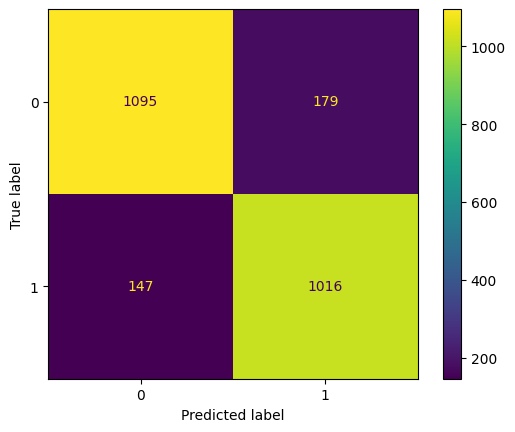

In [355]:
cm= confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()

In [356]:
fpr, tpr, threshold= roc_curve(Y_test,y_pred)
auc_rf= auc(fpr, tpr)

In [357]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC

In [358]:
model= Sequential([
    Dense(7,activation="relu", input_shape = (X_train.shape[1],)),
    Dense(1, activation="sigmoid")
])

In [359]:
model.summary()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["AUC"])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 7)                 35        
                                                                 
 dense_22 (Dense)            (None, 1)                 8         
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [360]:
model.fit(X_train, Y_train, batch_size=10, epochs=50)

Epoch 1/50
569/569 [==============================] - 2s 2ms/step - loss: 0.3397 - auc: 0.9421
Epoch 2/50
569/569 [==============================] - 1s 2ms/step - loss: 0.2350 - auc: 0.9691
Epoch 3/50
569/569 [==============================] - 1s 2ms/step - loss: 0.2042 - auc: 0.9742
Epoch 4/50
569/569 [==============================] - 1s 2ms/step - loss: 0.1893 - auc: 0.9760
Epoch 5/50
569/569 [==============================] - 1s 2ms/step - loss: 0.1786 - auc: 0.9783
Epoch 6/50
569/569 [==============================] - 1s 2ms/step - loss: 0.1689 - auc: 0.9813
Epoch 7/50
569/569 [==============================] - 1s 2ms/step - loss: 0.1587 - auc: 0.9845
Epoch 8/50
569/569 [==============================] - 1s 2ms/step - loss: 0.1493 - auc: 0.9870
Epoch 9/50
569/569 [==============================] - 1s 2ms/step - loss: 0.1415 - auc: 0.9889
Epoch 10/50
569/569 [==============================] - 1s 2ms/step - loss: 0.1350 - auc: 0.9901
Epoch 11/50
569/569 [============================

77/77 [==============================] - 0s 1ms/step


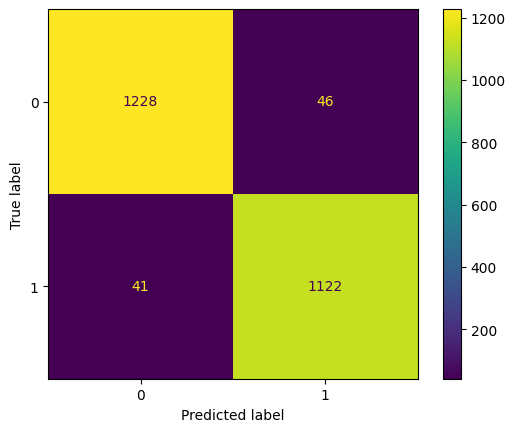

In [361]:
y_pred= model.predict(X_test)
y_pred= (y_pred>0.5)
cm= confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [362]:
accuracy_score(Y_test, y_pred)

0.9643003693065244

In [363]:
fpr_tf, tpr_tf, threshold_tf= roc_curve(Y_test,y_pred)
auc_tf= auc(fpr, tpr)

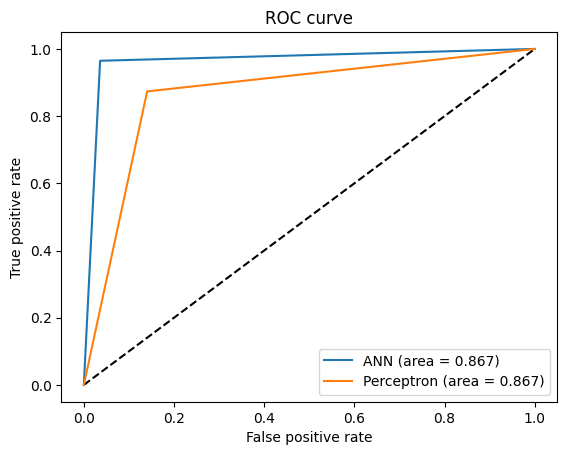

In [367]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tf, tpr_tf, label='ANN (area = {:.3f})'.format(auc_tf))
plt.plot(fpr, tpr, label='Perceptron (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()